<a href="https://colab.research.google.com/github/JMML2021/0401_Registre-de-logs/blob/main/0401_Registre-de-logs%20Rev%20C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
from urllib.request import urlretrieve
import pandas as pd
import os
import re
from datetime import datetime
import pytz
#import geocoder
import folium
import time
import urllib.request
import json
#import geopandas
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()


https://stackoverflow.com/questions/65324533/geopandas-in-google-colab

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 12.8 MB/s 
     |████████████████████████████████| 16.7 MB 18.5 MB/s 
     |████████████████████████████████| 6.3 MB 44.0 MB/s 


In [2]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




```
# Tiene formato de código
```

# Nivell 1
L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han d'estandaritzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió.

Com Científic de Dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites a realitzades a la pàgina web de l'agència de viatges "akumenius.com".


In [ ]:
# Abro archivo

df = list(open('/content/drive/MyDrive/Web_access_log-akumenius.com.txt'))
df[200:210]

['www.akumenius.com 180.76.5.31 - - [23/Feb/2014:03:15:03 +0100] "GET /destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-Zurich_SUIZA-con-Alquiler-de-silla-de-ruedas HTTP/1.1" 200 8360 "-" "Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html)" VLOG=-\n',
 'www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:15:03 +0100] "GET /hoteles-baratos/ofertas-hotel-Capitolio-Apartamentos-Turisticos-en-Merida-207271b-destinos.html HTTP/1.1" 404 3100 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" VLOG=-\n',
 'www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:15:06 +0100] "GET /destinos-baratos/destinosEstrelles/hoteles-en-Gary_ESTADOS%20UNIDOS-con-4-estrellas HTTP/1.1" 200 8812 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" VLOG=-\n',
 'www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:15:06 +0100] "GET /hoteles-baratos/ofertas-hotel-Guitart-Termes-La-Collada-en-La%20Molina-6833b-destinos.

# Creo un fichero de IPs chopeadas del original

In [ ]:
print('NUmero de registros:')
len(df)

NUmero de registros:


261873

# Exercici 1
Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

In [ ]:
#2.- Separo la parte central.

def custom_split(str_to_split):
    separatorsCentro = "[", "]", "\s", ",",' ','+', ')', '(', '"'
    # create regular expression dynamically
    regular_exp = '|'.join(map(re.escape, separatorsCentro))

    return re.split(regular_exp, str_to_split)

In [ ]:
def separoCorchete ( textoCortar):
  separatorsCentro = "]"
  regular_exp = '|'.join(map(re.escape, separatorsCentro))

  return re.split(regular_exp, textoCortar)



In [ ]:
def arregloFecha(x):
    '''
    Parses datetime with timezone formatted as:
        `[day/month/year:hour:minute:second zone]`

    Example:
        `>>> parse_datetime('13/Nov/2015:11:45:42 +0000')`
        `datetime.datetime(2015, 11, 3, 11, 45, 4, tzinfo=<UTC>)`

    Due to problems parsing the timezone (`%z`) with `datetime.strptime`, the
    timezone will be obtained using the `pytz` library.
    '''
    dt = datetime.strptime(x, '%d/%b/%Y:%H:%M:%S')

    #dt = datetime.strptime(x[0:-9], '%d/%b/%Y:%H:%M:%S')
    #print('Fecha ', dt)
    #dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
    #return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))
    return dt

In [ ]:
import re
 
chopear = input('Quieres abrir el fichero de nuevo y?'):
if chopper ='y' or chopper ='Y':
  texto=[]

    
  df1 = df.copy()
  data = {'virtual_host': [],    'IPs': [],    'Fecha': [],    'request': [],  'status': [], 'size': [], 'referer': [], 'user_agent': []}

  df_salida = pd.DataFrame(data)
  print('lineas total ------> ', len(df1))

  #for s, textoLinea  in enumerate(df1):
  #  print('Hola', s, textoLinea)

  for s, textoLinea  in enumerate(df1):
    #if len(textoLinea) == 23:
      #print ('---', s, textoLinea) 
    problematico= 0
    if s<10000000:
      textin = separoCorchete(textoLinea)

      #print(s, len(textin), textin[0])
      texto = custom_split(textin[0])
      nueva_fila = {'virtual_host': texto[0],
            'IPs': texto[1],
            'Fecha': arregloFecha(texto[5])}  # Lo tranformo en fecha
      #for p,q in enumerate(texto):
        #print(p, q)

      if s%10000 ==0 :
              print(s, 'Z--->', nueva_fila)
      #df_salida=pd.DataFrame.from_dict(nueva_fila, orient='index') 
      df_salida= df_salida.append(nueva_fila, ignore_index=True) 
      

    '''
    if s> problematico and s <= 300: # len(df1) :
      
      texto=custom_split(textoLinea)
      



      #print(s, len(texto), '<---', textoLinea) 
      #print( texto[5])
      #print('longitud', len(texto))  

      if len(texto)> 125:
        #print(s, texto[1])
        nueva_fila = {'virtual_host': texto[0],
            'IPs': texto[1],
            'Fecha': arregloFecha(texto[5]),  # Lo tranformo en fecha
            'request': texto[11],
            'status': texto[14],
            'size': texto[15], 
            'referer': texto[20]}

      else:
        #print (s,'MALO    long=',  len(texto), textoLinea)
        for p,q in enumerate(texto):
          print(p,q)
      
      
      if len(texto)> 23:            
            nueva_fila = {'user_agent': texto[23]}
      else:
        nueva_fila = {'user_agent': []}
      
      if len(texto)> 25:      
        nueva_fila = {'Navegador': texto[25]}
      else:
        nueva_fila = {'Navegador': []}
      
    '''
      
    
    #if len(texto) <=23:
      
      
          
  # Guardo la informacion en drive   
  path = ('/content/drive/MyDrive/01_COLAB/' +'direcionesIP.csv')
  df_salida.to_csv(path)
  #
  #df_salida.type
  print('Forma ', df_salida.shape)

  df_salida.head(-20)


lineas total ------>  261873
0 Z---> {'virtual_host': 'localhost', 'IPs': '127.0.0.1', 'Fecha': datetime.datetime(2014, 2, 23, 3, 10, 31)}
10000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '144.76.95.232', 'Fecha': datetime.datetime(2014, 2, 23, 10, 24, 39)}
20000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '180.76.5.171', 'Fecha': datetime.datetime(2014, 2, 23, 15, 14, 11)}
30000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '157.56.92.146', 'Fecha': datetime.datetime(2014, 2, 23, 19, 29, 16)}
40000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '66.249.76.216', 'Fecha': datetime.datetime(2014, 2, 23, 23, 40, 6)}
50000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '87.221.174.146', 'Fecha': datetime.datetime(2014, 2, 24, 9, 13, 48)}
60000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '83.37.239.190', 'Fecha': datetime.datetime(2014, 2, 24, 12, 43, 28)}
70000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '83.61.241.37', 'Fecha': datetime.datetime(2

virtual_host            IPs               Fecha  request  status  \
0               localhost      127.0.0.1 2014-02-23 03:10:31      NaN     NaN   
1               localhost      127.0.0.1 2014-02-23 03:10:31      NaN     NaN   
2               localhost      127.0.0.1 2014-02-23 03:10:31      NaN     NaN   
3               localhost      127.0.0.1 2014-02-23 03:10:31      NaN     NaN   
4               localhost      127.0.0.1 2014-02-23 03:10:31      NaN     NaN   
...                   ...            ...                 ...      ...     ...   
261848  www.akumenius.com  66.249.76.216 2014-03-02 02:56:17      NaN     NaN   
261849  www.akumenius.com  66.249.76.216 2014-03-02 02:57:21      NaN     NaN   
261850  www.akumenius.com  66.249.76.216 2014-03-02 02:57:46      NaN     NaN   
261851  www.akumenius.com  74.86.158.107 2014-03-02 02:59:52      NaN     NaN   
261852  www.akumenius.com  66.249.76.216 2014-03-02 03:00:15      NaN     NaN   

        size  referer  user_agent  
0        NaN      NaN         NaN  
1        NaN      NaN         NaN  
2        NaN      NaN         NaN  
3        NaN      NaN         NaN  
4        NaN      NaN         NaN  
...      ...      ...         ...  
261848   NaN      NaN         NaN  
261849   NaN      NaN         NaN  
261850   NaN      NaN         NaN  
261851   NaN      NaN         NaN  
261852   NaN      NaN         NaN  

[261853 rows x 8 columns]

In [ ]:
print(type(df_salida))
print(df_salida.dtypes)
print('Tmaño: ', df_salida.shape)

<class 'pandas.core.frame.DataFrame'>
virtual_host            object
IPs                     object
Fecha           datetime64[ns]
request                float64
status                 float64
size                   float64
referer                float64
user_agent             float64
dtype: object
Tmaño:  (261873, 8)


# Abrir fichero de IPs creado

In [14]:
path = ('/content/drive/MyDrive/01_COLAB/' +'direcionesIP.csv')
df=  pd.read_csv(path)
print('Tamaño antes de tomar una muestra: ', df.shape)

#df = df.sample(frac = 0.5)
#df = df[1294:1305]
print(type(df))
print('Tamaño: ', df.shape)

Tamaño antes de tomar una muestra:  (261873, 9)
<class 'pandas.core.frame.DataFrame'>
Tamaño:  (261873, 9)


# Exercici 2
Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

Lo primero que voy a hacer es minimizar la base de datos.
La manera que se me ha ocurrido es poner un contador por Ip y asi si hay IP repetidas solo la buscará una vez y tendre la cantidad en el df

In [15]:
data_ip =df["IPs"].value_counts().rename_axis('ip').reset_index(name="visits")
data_ip.head()

ip  visits
0   66.249.76.216   46382
1   80.28.221.123   14725
2       127.0.0.1   13892
3  217.125.71.222    5201
4   66.249.75.148    3558

In [4]:
!pip install geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 4.8 MB/s 


In [5]:
import geocoder

ip = geocoder.ip("157.55.32.183")
print(ip.city)
print(ip)
print(ip.latlng)

Cleveland
<[OK] Ipinfo - Geocode [Cleveland, Ohio, US]>
[41.4995, -81.6954]


# Exercici 3
Geolocalitza les IP's.

In [6]:

location = geocoder.ip('66.249.76.216')

In [16]:
posicion = []

for index, value in data_ip["ip"].items():
    with urllib.request.urlopen("https://geolocation-db.com/jsonp/"+value,timeout=500) as url:
                data = url.read().decode()
                data = data.split("(")[1].strip(")")
                data = json.loads(data)
                posicion.append(data)


KeyboardInterrupt: ignored

In [35]:
posicion = pd.DataFrame(posicion)
 
type(posicion)


country_code   country_name      city postal latitude longitude  \
0           US  United States      None   None   37.751   -97.822   
1           ES          Spain    Madrid  28045  40.4165   -3.7026   
3           ES          Spain  Bormujos  41930  37.3736   -6.0723   
4           US  United States      None   None   37.751   -97.822   
5           US  United States  New York  10011  40.7308  -73.9975   

              IPv4     state  cantidad                    geometry  
0    66.249.76.216      None     46382  POINT (-97.82200 37.75100)  
1    80.28.221.123    Madrid     14725   POINT (-3.70260 40.41650)  
3   217.125.71.222   Seville      5201   POINT (-6.07230 37.37360)  
4    66.249.75.148      None      3558  POINT (-97.82200 37.75100)  
5  162.243.192.191  New York      2927  POINT (-73.99750 40.73080)

In [23]:


!pip install geopandas
import geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.7 MB/s 
     |████████████████████████████████| 16.7 MB 38.8 MB/s 
     |████████████████████████████████| 6.3 MB 68.6 MB/s 


In [18]:
posicion['cantidad'] = data_ip['visits']
posicion = posicion[posicion['state']!= 'Not found']
posicion

country_code   country_name      city postal latitude longitude  \
0           US  United States      None   None   37.751   -97.822   
1           ES          Spain    Madrid  28045  40.4165   -3.7026   
3           ES          Spain  Bormujos  41930  37.3736   -6.0723   
4           US  United States      None   None   37.751   -97.822   
5           US  United States  New York  10011  40.7308  -73.9975   
6           ES          Spain  Valencia  46015  39.4698   -0.3774   

              IPv4     state  cantidad  
0    66.249.76.216      None     46382  
1    80.28.221.123    Madrid     14725  
3   217.125.71.222   Seville      5201  
4    66.249.75.148      None      3558  
5  162.243.192.191  New York      2927  
6   62.117.197.230  Valencia      2567

In [47]:
  # Guardo el archivo con la geoposiciones

  pathPosicion = ('/content/drive/MyDrive/01_COLAB/' +'GEOdirecionesIP.csv')

In [ ]:
  sobreEscribir = input(Quiere sobre escribir el fichero? y/Y)
  if sobreEscribir=='Y' or sobreEscribir=='y':
    posicion.to_csv(path)

Si ya hemos geolocacliadas todas las Ips, entonces solo tenemos que descar el fichero y no hace falta repetir todos los pasos anteriores

In [59]:
# Abro archivo

posicion = pd.read_csv(pathPosicion)
posicion[200:210]

Unnamed: 0 country_code   country_name             city postal  latitude  \
200         201           ES          Spain           Madrid  28028   40.4165   
201         202           US  United States              NaN    NaN   47.6062   
202         203           ES          Spain           Madrid  28034   40.4165   
203         204           ES          Spain  Vitoria-Gasteiz  01010   42.8500   
204         205           ES          Spain              NaN    NaN   40.4172   
205         206           ES          Spain              NaN    NaN   40.4172   
206         207           ES          Spain              NaN    NaN   40.4172   
207         208           ES          Spain             León  24008   42.6000   
208         209           ES          Spain        Salobreña  18680   36.7428   
209         210           ES          Spain              NaN    NaN   40.4172   

     longitude            IPv4          state  cantidad  \
200    -3.7026      95.63.2.45         Madrid       176   
201  -122.3321   157.56.92.174     Washington       176   
202    -3.7026   85.48.101.193         Madrid       175   
203    -2.6727   85.84.176.196  Araba / Álava       174   
204    -3.6840  188.76.115.200            NaN       174   
205    -3.6840     31.4.236.23            NaN       174   
206    -3.6840  62.175.136.122            NaN       173   
207    -5.5703   77.229.122.97           Leon       173   
208    -3.5872  185.16.209.176        Granada       172   
209    -3.6840   87.223.105.21            NaN       171   

                      geometry  
200    POINT (-3.7026 40.4165)  
201  POINT (-122.3321 47.6062)  
202    POINT (-3.7026 40.4165)  
203      POINT (-2.6727 42.85)  
204     POINT (-3.684 40.4172)  
205     POINT (-3.684 40.4172)  
206     POINT (-3.684 40.4172)  
207       POINT (-5.5703 42.6)  
208    POINT (-3.5872 36.7428)  
209     POINT (-3.684 40.4172)

In [60]:
posicion = pd.DataFrame(posicion)
 
type(posicion)

pandas.core.frame.DataFrame

In [61]:
posicion.head(-1)

Unnamed: 0 country_code   country_name      city postal  latitude  \
0              0           US  United States       NaN    NaN   37.7510   
1              1           ES          Spain    Madrid  28045   40.4165   
2              3           ES          Spain  Bormujos  41930   37.3736   
3              4           US  United States       NaN    NaN   37.7510   
4              5           US  United States  New York  10011   40.7308   
...          ...          ...            ...       ...    ...       ...   
2913        2915           EC        Ecuador      Loja    NaN   -4.0000   
2914        2916           ES          Spain    Gandia  46701   38.9667   
2915        2917           ES          Spain       NaN    NaN   40.4172   
2916        2918           CN          China       NaN    NaN   34.7725   
2917        2919           US  United States       NaN    NaN   37.7510   

      longitude             IPv4              state  cantidad  \
0      -97.8220    66.249.76.216                NaN     46382   
1       -3.7026    80.28.221.123             Madrid     14725   
2       -6.0723   217.125.71.222            Seville      5201   
3      -97.8220    66.249.75.148                NaN      3558   
4      -73.9975  162.243.192.191           New York      2927   
...         ...              ...                ...       ...   
2913   -79.2167       200.0.29.9  Provincia de Loja         1   
2914    -0.1833    84.123.150.27           Valencia         1   
2915    -3.6840  217.130.150.116                NaN         1   
2916   113.7266     202.46.52.23                NaN         1   
2917   -97.8220  216.151.130.170                NaN         1   

                      geometry  
0       POINT (-97.822 37.751)  
1      POINT (-3.7026 40.4165)  
2      POINT (-6.0723 37.3736)  
3       POINT (-97.822 37.751)  
4     POINT (-73.9975 40.7308)  
...                        ...  
2913       POINT (-79.2167 -4)  
2914   POINT (-0.1833 38.9667)  
2915    POINT (-3.684 40.4172)  
2916  POINT (113.7266 34.7725)  
2917    POINT (-97.822 37.751)  

[2918 rows x 11 columns]

In [62]:
# Elimino todos los registros que no tengan informacion
# por ejemplo los 'not found'

posicion['cantidad'] = data_ip['visits']
posicion = posicion[posicion['latitude']!= 'Not found']
posicion.shape

(2919, 11)

In [63]:
posicion['latitude'].astype(float, errors = 'raise')
posicion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2919 non-null   int64  
 1   country_code  2906 non-null   object 
 2   country_name  2906 non-null   object 
 3   city          1804 non-null   object 
 4   postal        1631 non-null   object 
 5   latitude      2919 non-null   float64
 6   longitude     2919 non-null   float64
 7   IPv4          2919 non-null   object 
 8   state         2200 non-null   object 
 9   cantidad      2919 non-null   int64  
 10  geometry      2919 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 273.7+ KB


In [64]:
gdf = geopandas.GeoDataFrame(
    posicion, geometry=geopandas.points_from_xy(posicion.longitude,posicion.latitude))

In [65]:
gdf.head(-1)

Unnamed: 0 country_code   country_name      city postal  latitude  \
0              0           US  United States       NaN    NaN   37.7510   
1              1           ES          Spain    Madrid  28045   40.4165   
2              3           ES          Spain  Bormujos  41930   37.3736   
3              4           US  United States       NaN    NaN   37.7510   
4              5           US  United States  New York  10011   40.7308   
...          ...          ...            ...       ...    ...       ...   
2913        2915           EC        Ecuador      Loja    NaN   -4.0000   
2914        2916           ES          Spain    Gandia  46701   38.9667   
2915        2917           ES          Spain       NaN    NaN   40.4172   
2916        2918           CN          China       NaN    NaN   34.7725   
2917        2919           US  United States       NaN    NaN   37.7510   

      longitude             IPv4              state  cantidad  \
0      -97.8220    66.249.76.216                NaN     46382   
1       -3.7026    80.28.221.123             Madrid     14725   
2       -6.0723   217.125.71.222            Seville     13892   
3      -97.8220    66.249.75.148                NaN      5201   
4      -73.9975  162.243.192.191           New York      3558   
...         ...              ...                ...       ...   
2913   -79.2167       200.0.29.9  Provincia de Loja         1   
2914    -0.1833    84.123.150.27           Valencia         1   
2915    -3.6840  217.130.150.116                NaN         1   
2916   113.7266     202.46.52.23                NaN         1   
2917   -97.8220  216.151.130.170                NaN         1   

                        geometry  
0     POINT (-97.82200 37.75100)  
1      POINT (-3.70260 40.41650)  
2      POINT (-6.07230 37.37360)  
3     POINT (-97.82200 37.75100)  
4     POINT (-73.99750 40.73080)  
...                          ...  
2913  POINT (-79.21670 -4.00000)  
2914   POINT (-0.18330 38.96670)  
2915   POINT (-3.68400 40.41720)  
2916  POINT (113.72660 34.77250)  
2917  POINT (-97.82200 37.75100)  

[2918 rows x 11 columns]

In [66]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

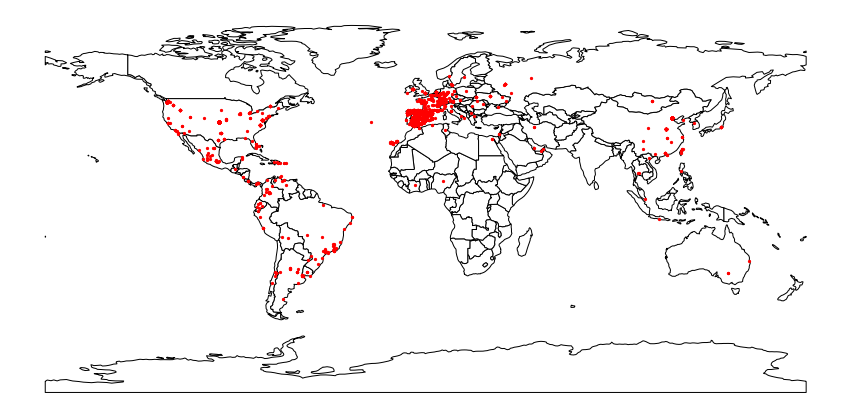

In [67]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
ax.set_axis_off()

gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()

In [87]:
! pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[40.965, -5.664], zoom_start=3)
mc = MarkerCluster()

In [69]:
#! pip install geocoder

In [129]:
for i in range(0,len(posicion)):
    mc.add_child(folium.Marker(
        location=[posicion.iloc[i]["latitude"],posicion.iloc[i]["longitude"]],
        popup=str(posicion.iloc[i]["cantidad"]),))

In [130]:
m.add_child(mc)

In [ ]:
https://datasciencesphere.com/project/track-location-ip-address-python-geocoder/

# Exercici 3
Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

https://datasciencesphere.com/project/track-location-ip-address-python-geocoder/

In [102]:
Spain = posicion[(posicion['country_name'] == 'Spain') | (posicion['country_name'] == 'Portugal')]

In [103]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[40.965, -5.664], zoom_start=7)
mc = MarkerCluster()

In [131]:
posiciones=[]
from folium import plugins
 
mapa = folium.Map(location=[40.4167, -3.70325], zoom_start=4.9, width= 800, height =700)

for i in range(0,len(Spain)):
  posiciones.append([Spain.iloc[i]["latitude"],Spain.iloc[i]["longitude"]])

mapa.add_child(plugins.HeatMap(posiciones[:]))

In [84]:
for i in range(0,len(Spain)):
    mc.add_child(folium.Marker(
        location=[Spain.iloc[i]["latitude"],Spain.iloc[i]["longitude"]],
        popup=str(Spain.iloc[i]["cantidad"]),))
m.add_child(mc)

In [ ]:
import requests

url = 'https://maps.googleapis.com/maps/api/geocode/json'
r = requests.get(url, params={
    'sensor': 'false', 
    'address': 'Centre Pompidou, Paris, FR'
})

results = r.json()['results']
results
#location = results[0]['geometry']['location']
#lat, lng = location['lat'], location['lng']

[]

https://janakiev.com/blog/geocoding-in-python/

In [ ]:
location = geocoder.ip("66.249.76.216")
print(ip.city)
print(ip)
print(ip.latlng)

location = ip.latlng
lat, lng = location[0], location[1]

#location = results[0]['geometry']['location']
#lat, lng = location['lat'], location['lng']

print(lat, lng, location)

NameError: ignored